##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE123902**

file previously downloaded:
GSE123902_RAW.tar
GSE123902_GEO_README.rtf

unzipped using 
``` bash
tar -xvf GSE123902_RAW.tar
```

This gives the following files:                         
* GSM3516667_MSK_LX676_PRIMARY_TUMOUR_dense.csv.gz  
* GSM3516674_MSK_LX684_PRIMARY_TUMOUR_dense.csv.gz                            
* GSM3516668_MSK_LX255B_METASTASIS_dense.csv.gz     
* GSM3516675_MSK_LX684_NORMAL_dense.csv.gz
* GSM3516662_MSK_LX653_PRIMARY_TUMOUR_dense.csv.gz  
* GSM3516669_MSK_LX679_PRIMARY_TUMOUR_dense.csv.gz  
* GSM3516676_MSK_LX685_NORMAL_dense.csv.gz
* GSM3516663_MSK_LX661_PRIMARY_TUMOUR_dense.csv.gz  
* GSM3516670_MSK_LX680_PRIMARY_TUMOUR_dense.csv.gz  
* GSM3516677_MSK_LX699_METASTASIS_dense.csv.gz
* GSM3516664_MSK_LX666_METASTASIS_dense.csv.gz      
* GSM3516671_MSK_LX681_METASTASIS_dense.csv.gz      
* GSM3516678_MSK_LX701_METASTASIS_dense.csv.gz
* GSM3516665_MSK_LX675_PRIMARY_TUMOUR_dense.csv.gz  
* GSM3516672_MSK_LX682_PRIMARY_TUMOUR_dense.csv.gz
* GSM3516666_MSK_LX675_NORMAL_dense.csv.gz          
* GSM3516673_MSK_LX682_NORMAL_dense.csv.gz


In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE123902')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE123902"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [6]:
#load all datasets
LX653tu.data <- t(read.csv("GSM3516662_MSK_LX653_PRIMARY_TUMOUR_dense.csv.gz", row.names=1))
LX661tu.data <- t(read.csv("GSM3516663_MSK_LX661_PRIMARY_TUMOUR_dense.csv.gz", row.names=1))
LX666met.data <- t(read.csv("GSM3516664_MSK_LX666_METASTASIS_dense.csv.gz", row.names=1))
LX675tu.data <- t(read.csv("GSM3516665_MSK_LX675_PRIMARY_TUMOUR_dense.csv.gz", row.names=1))
LX675Nor.data <- t(read.csv("GSM3516666_MSK_LX675_NORMAL_dense.csv.gz", row.names=1))
LX676tu.data <- t(read.csv("GSM3516667_MSK_LX676_PRIMARY_TUMOUR_dense.csv.gz", row.names=1))
LX255Bmet.data <- t(read.csv("GSM3516668_MSK_LX255B_METASTASIS_dense.csv.gz", row.names=1))
LX679tu.data <- t(read.csv("GSM3516669_MSK_LX679_PRIMARY_TUMOUR_dense.csv.gz", row.names=1))
LX680tu.data <- t(read.csv("GSM3516670_MSK_LX680_PRIMARY_TUMOUR_dense.csv.gz", row.names=1))
LX681met.data <- t(read.csv("GSM3516671_MSK_LX681_METASTASIS_dense.csv.gz", row.names=1))
LX682tu.data <- t(read.csv("GSM3516672_MSK_LX682_PRIMARY_TUMOUR_dense.csv.gz", row.names=1))
LX682Nor.data <- t(read.csv("GSM3516673_MSK_LX682_NORMAL_dense.csv.gz", row.names=1))
LX684tu.data <- t(read.csv("GSM3516674_MSK_LX684_PRIMARY_TUMOUR_dense.csv.gz", row.names=1))
LX684Nor.data <- t(read.csv("GSM3516675_MSK_LX684_NORMAL_dense.csv.gz", row.names=1))
LX685Nor.data <- t(read.csv("GSM3516676_MSK_LX685_NORMAL_dense.csv.gz", row.names=1))
LX699met.data <- t(read.csv("GSM3516677_MSK_LX699_METASTASIS_dense.csv.gz", row.names=1))
LX701met.data <- t(read.csv("GSM3516678_MSK_LX701_METASTASIS_dense.csv.gz", row.names=1))

In [8]:
#Add dataset info to colnames
colnames(LX653tu.data) <- paste0("GSE123902_LX653_Tumour_", colnames(LX653tu.data))
colnames(LX661tu.data) <- paste0("GSE123902_LX661_Tumour_", colnames(LX661tu.data))
colnames(LX666met.data) <- paste0("GSE123902_LX666_Metastasis_", colnames(LX666met.data))
colnames(LX675tu.data) <- paste0("GSE123902_LX675_Tumour_", colnames(LX675tu.data))
colnames(LX675Nor.data) <- paste0("GSE123902_LX675_Normal_", colnames(LX675Nor.data))
colnames(LX676tu.data) <- paste0("GSE123902_LX676_Tumour_", colnames(LX676tu.data))
colnames(LX255Bmet.data) <- paste0("GSE123902_LX255B_Metastasis_", colnames(LX255Bmet.data))
colnames(LX679tu.data) <- paste0("GSE123902_LX679_Tumour_", colnames(LX679tu.data))
colnames(LX680tu.data) <- paste0("GSE123902_LX680_Tumour_", colnames(LX680tu.data))
colnames(LX681met.data) <- paste0("GSE123902_LX681_Metastasis_", colnames(LX681met.data))
colnames(LX682tu.data) <- paste0("GSE123902_LX682_Tumour_", colnames(LX682tu.data))
colnames(LX682Nor.data) <- paste0("GSE123902_LX682_Normal_", colnames(LX682Nor.data))
colnames(LX684tu.data) <- paste0("GSE123902_LX684_Tumour_", colnames(LX684tu.data))
colnames(LX684Nor.data) <- paste0("GSE123902_LX684_Normal_", colnames(LX684Nor.data))
colnames(LX685Nor.data) <- paste0("GSE123902_LX685_Normal_", colnames(LX685Nor.data))
colnames(LX699met.data) <- paste0("GSE123902_LX699_Metastasis_", colnames(LX699met.data))
colnames(LX701met.data) <- paste0("GSE123902_LX701_Metastasis_", colnames(LX701met.data))

In [9]:
head(colnames(LX653tu.data))
head(colnames(LX255Bmet.data))
head(colnames(LX685Nor.data))

[1] "GSE123902_LX653_Tumour_120703436614579"
[2] "GSE123902_LX653_Tumour_120726924712805"
[3] "GSE123902_LX653_Tumour_120772934388134"
[4] "GSE123902_LX653_Tumour_120786758522667"
[5] "GSE123902_LX653_Tumour_120797912811867"
[6] "GSE123902_LX653_Tumour_120864470887134"

[1] "GSE123902_LX255B_Metastasis_120703408781739"
[2] "GSE123902_LX255B_Metastasis_120703423796963"
[3] "GSE123902_LX255B_Metastasis_120703424313269"
[4] "GSE123902_LX255B_Metastasis_120703436406133"
[5] "GSE123902_LX255B_Metastasis_120703455250789"
[6] "GSE123902_LX255B_Metastasis_120726897407862"

[1] "GSE123902_LX685_Normal_120703409146094"
[2] "GSE123902_LX685_Normal_120703409411806"
[3] "GSE123902_LX685_Normal_120703423498982"
[4] "GSE123902_LX685_Normal_120726897155357"
[5] "GSE123902_LX685_Normal_120726912461604"
[6] "GSE123902_LX685_Normal_120726943132523"

In [10]:
#create seperate seurat object for each sample
LX653tu <- CreateSeuratObject(counts = LX653tu.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX653tu@meta.data$sample_type <- "Primary Tumour"
LX653tu@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX653tu@meta.data$patient_id <- "LX653"
LX653tu@meta.data$sample_id <- "GSE123902_Lung-Adeno_Tumour_LX653"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [11]:
#create seperate seurat object for each sample
LX661tu <- CreateSeuratObject(counts = LX661tu.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX661tu@meta.data$sample_type <- "Primary Tumour"
LX661tu@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX661tu@meta.data$patient_id <- "LX661"
LX661tu@meta.data$sample_id <- "GSE123902_Lung-Adeno_Tumour_LX661"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [12]:
#create seperate seurat object for each sample
LX666met <- CreateSeuratObject(counts = LX666met.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX666met@meta.data$sample_type <- "Metastasis"
LX666met@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX666met@meta.data$patient_id <- "LX666"
LX666met@meta.data$sample_id <- "GSE123902_Lung-Adeno_Mets_LX666"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [13]:
#create seperate seurat object for each sample
LX675tu <- CreateSeuratObject(counts = LX675tu.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX675tu@meta.data$sample_type <- "Primary Tumour"
LX675tu@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX675tu@meta.data$patient_id <- "LX675"
LX675tu@meta.data$sample_id <- "GSE123902_Lung-Adeno_Tumour_LX675"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [14]:
#create seperate seurat object for each sample
LX675Nor <- CreateSeuratObject(counts = LX675Nor.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX675Nor@meta.data$sample_type <- "Healthy Lung"
LX675Nor@meta.data$cancer_type <- "Healthy"
LX675Nor@meta.data$patient_id <- "LX675"
LX675Nor@meta.data$sample_id <- "GSE123902_Healthy_Lung_LX675"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [15]:
#create seperate seurat object for each sample
LX676tu <- CreateSeuratObject(counts = LX676tu.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX676tu@meta.data$sample_type <- "Primary Tumour"
LX676tu@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX676tu@meta.data$patient_id <- "LX676"
LX676tu@meta.data$sample_id <- "GSE123902_Lung-Adeno_Tumour_LX676"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [16]:
#create seperate seurat object for each sample
LX255Bmet <- CreateSeuratObject(counts = LX255Bmet.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX255Bmet@meta.data$sample_type <- "Metastasis"
LX255Bmet@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX255Bmet@meta.data$patient_id <- "LX255B"
LX255Bmet@meta.data$sample_id <- "GSE123902_Lung-Adeno_Mets_LX255B"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [17]:
#create seperate seurat object for each sample
LX679tu <- CreateSeuratObject(counts = LX679tu.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX679tu@meta.data$sample_type <- "Primary Tumour"
LX679tu@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX679tu@meta.data$patient_id <- "LX679"
LX679tu@meta.data$sample_id <- "GSE123902_Lung-Adeno_Tumour_LX679"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [18]:
#create seperate seurat object for each sample
LX680tu <- CreateSeuratObject(counts = LX680tu.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX680tu@meta.data$sample_type <- "Primary Tumour"
LX680tu@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX680tu@meta.data$patient_id <- "LX680"
LX680tu@meta.data$sample_id <- "GSE123902_Lung-Adeno_Tumour_LX680"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [19]:
#create seperate seurat object for each sample
LX681met <- CreateSeuratObject(counts = LX681met.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX681met@meta.data$sample_type <- "Metastasis"
LX681met@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX681met@meta.data$patient_id <- "LX681"
LX681met@meta.data$sample_id <- "GSE123902_Lung-Adeno_Mets_LX681"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [20]:
#create seperate seurat object for each sample
LX682tu <- CreateSeuratObject(counts = LX682tu.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX682tu@meta.data$sample_type <- "Primary Tumour"
LX682tu@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX682tu@meta.data$patient_id <- "LX682"
LX682tu@meta.data$sample_id <- "GSE123902_Lung-Adeno_Tumour_LX682"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [21]:
#create seperate seurat object for each sample
LX682Nor <- CreateSeuratObject(counts = LX682Nor.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX682Nor@meta.data$sample_type <- "Healthy Lung"
LX682Nor@meta.data$cancer_type <- "Healthy"
LX682Nor@meta.data$patient_id <- "LX682"
LX682Nor@meta.data$sample_id <- "GSE123902_Healthy_Lung_LX682"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [22]:
#create seperate seurat object for each sample
LX684tu <- CreateSeuratObject(counts = LX684tu.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX684tu@meta.data$sample_type <- "Primary Tumour"
LX684tu@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX684tu@meta.data$patient_id <- "LX684"
LX684tu@meta.data$sample_id <- "GSE123902_Lung-Adeno_Tumour_LX684"

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [23]:
#create seperate seurat object for each sample
LX684Nor <- CreateSeuratObject(counts = LX684Nor.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX684Nor@meta.data$sample_type <- "Healthy Lung"
LX684Nor@meta.data$cancer_type <- "Healthy"
LX684Nor@meta.data$patient_id <- "LX684"
LX684Nor@meta.data$sample_id <- "GSE123902_Healthy_Lung_LX684"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [24]:
#create seperate seurat object for each sample
LX685Nor <- CreateSeuratObject(counts = LX685Nor.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX685Nor@meta.data$sample_type <- "Healthy Lung"
LX685Nor@meta.data$cancer_type <- "Healthy"
LX685Nor@meta.data$patient_id <- "LX685"
LX685Nor@meta.data$sample_id <- "GSE123902_Healthy_Lung_LX685"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [25]:
#create seperate seurat object for each sample
LX699met <- CreateSeuratObject(counts = LX699met.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX699met@meta.data$sample_type <- "Metastasis"
LX699met@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX699met@meta.data$patient_id <- "LX699"
LX699met@meta.data$sample_id <- "GSE123902_Lung-Adeno_Mets_LX699"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [26]:
#create seperate seurat object for each sample
LX701met <- CreateSeuratObject(counts = LX701met.data, project = "GSE123902", min.features = 200)
#add metadata to sample
LX701met@meta.data$sample_type <- "Metastasis"
LX701met@meta.data$cancer_type <- "Lung Adenocarcinoma"
LX701met@meta.data$patient_id <- "LX701"
LX701met@meta.data$sample_id <- "GSE123902_Lung-Adeno_Mets_LX701"

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [27]:
head(LX653tu@meta.data) 
head(LX255Bmet@meta.data) 
head(LX684Nor@meta.data) 

orig.ident nCount_RNA nFeature_RNA
GSE123902_LX653_Tumour_120703436614579 GSE123902   948        400        
GSE123902_LX653_Tumour_120726924712805 GSE123902   591        293        
GSE123902_LX653_Tumour_120772934388134 GSE123902  3680       1239        
GSE123902_LX653_Tumour_120786758522667 GSE123902  2543        886        
GSE123902_LX653_Tumour_120864470887134 GSE123902  5460       1412        
GSE123902_LX653_Tumour_121276833327460 GSE123902  2340        915        
                                       sample_type    cancer_type        
GSE123902_LX653_Tumour_120703436614579 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_120726924712805 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_120772934388134 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_120786758522667 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_120864470887134 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_121276833327460 Primary Tumour Lung Adenocarcinoma
                                       patient_id
GSE123902_LX653_Tumour_120703436614579 LX653     
GSE123902_LX653_Tumour_120726924712805 LX653     
GSE123902_LX653_Tumour_120772934388134 LX653     
GSE123902_LX653_Tumour_120786758522667 LX653     
GSE123902_LX653_Tumour_120864470887134 LX653     
GSE123902_LX653_Tumour_121276833327460 LX653     
                                       sample_id                        
GSE123902_LX653_Tumour_120703436614579 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_120726924712805 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_120772934388134 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_120786758522667 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_120864470887134 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_121276833327460 GSE123902_Lung-Adeno_Tumour_LX653

orig.ident nCount_RNA nFeature_RNA
GSE123902_LX255B_Metastasis_120703408781739 GSE123902   848       299         
GSE123902_LX255B_Metastasis_120703423796963 GSE123902   409       227         
GSE123902_LX255B_Metastasis_120703436406133 GSE123902  2693       991         
GSE123902_LX255B_Metastasis_120703455250789 GSE123902   632       260         
GSE123902_LX255B_Metastasis_120726897407862 GSE123902   970       471         
GSE123902_LX255B_Metastasis_120726911642924 GSE123902   772       284         
                                            sample_type cancer_type        
GSE123902_LX255B_Metastasis_120703408781739 Metastasis  Lung Adenocarcinoma
GSE123902_LX255B_Metastasis_120703423796963 Metastasis  Lung Adenocarcinoma
GSE123902_LX255B_Metastasis_120703436406133 Metastasis  Lung Adenocarcinoma
GSE123902_LX255B_Metastasis_120703455250789 Metastasis  Lung Adenocarcinoma
GSE123902_LX255B_Metastasis_120726897407862 Metastasis  Lung Adenocarcinoma
GSE123902_LX255B_Metastasis_120726911642924 Metastasis  Lung Adenocarcinoma
                                            patient_id
GSE123902_LX255B_Metastasis_120703408781739 LX255B    
GSE123902_LX255B_Metastasis_120703423796963 LX255B    
GSE123902_LX255B_Metastasis_120703436406133 LX255B    
GSE123902_LX255B_Metastasis_120703455250789 LX255B    
GSE123902_LX255B_Metastasis_120726897407862 LX255B    
GSE123902_LX255B_Metastasis_120726911642924 LX255B    
                                            sample_id                       
GSE123902_LX255B_Metastasis_120703408781739 GSE123902_Lung-Adeno_Mets_LX255B
GSE123902_LX255B_Metastasis_120703423796963 GSE123902_Lung-Adeno_Mets_LX255B
GSE123902_LX255B_Metastasis_120703436406133 GSE123902_Lung-Adeno_Mets_LX255B
GSE123902_LX255B_Metastasis_120703455250789 GSE123902_Lung-Adeno_Mets_LX255B
GSE123902_LX255B_Metastasis_120726897407862 GSE123902_Lung-Adeno_Mets_LX255B
GSE123902_LX255B_Metastasis_120726911642924 GSE123902_Lung-Adeno_Mets_LX255B

orig.ident nCount_RNA nFeature_RNA
GSE123902_LX684_Normal_120703409408307 GSE123902  3542       1442        
GSE123902_LX684_Normal_120703409571572 GSE123902  2905        933        
GSE123902_LX684_Normal_120703436610405 GSE123902  2739        830        
GSE123902_LX684_Normal_120703454993204 GSE123902  3389       1195        
GSE123902_LX684_Normal_120703455026014 GSE123902  3716       1366        
GSE123902_LX684_Normal_120703455743323 GSE123902  9928       2355        
                                       sample_type  cancer_type patient_id
GSE123902_LX684_Normal_120703409408307 Healthy Lung Healthy     LX684     
GSE123902_LX684_Normal_120703409571572 Healthy Lung Healthy     LX684     
GSE123902_LX684_Normal_120703436610405 Healthy Lung Healthy     LX684     
GSE123902_LX684_Normal_120703454993204 Healthy Lung Healthy     LX684     
GSE123902_LX684_Normal_120703455026014 Healthy Lung Healthy     LX684     
GSE123902_LX684_Normal_120703455743323 Healthy Lung Healthy     LX684     
                                       sample_id                   
GSE123902_LX684_Normal_120703409408307 GSE123902_Healthy_Lung_LX684
GSE123902_LX684_Normal_120703409571572 GSE123902_Healthy_Lung_LX684
GSE123902_LX684_Normal_120703436610405 GSE123902_Healthy_Lung_LX684
GSE123902_LX684_Normal_120703454993204 GSE123902_Healthy_Lung_LX684
GSE123902_LX684_Normal_120703455026014 GSE123902_Healthy_Lung_LX684
GSE123902_LX684_Normal_120703455743323 GSE123902_Healthy_Lung_LX684

In [28]:
#Merge seurat objects
LUNG <- merge(LX653tu, y = c(LX661tu, LX666met, LX675tu, LX675Nor, LX676tu, LX255Bmet, LX679tu, LX680tu, LX681met, LX682tu, LX682Nor, LX684tu, LX684Nor, LX685Nor, LX699met, LX701met), project = "GSE123902")


In [29]:
LUNG
head(LUNG@meta.data)
tail(LUNG@meta.data)

An object of class Seurat 
23278 features across 39569 samples within 1 assay 
Active assay: RNA (23278 features, 0 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17

orig.ident nCount_RNA nFeature_RNA
GSE123902_LX653_Tumour_120703436614579 GSE123902   948        400        
GSE123902_LX653_Tumour_120726924712805 GSE123902   591        293        
GSE123902_LX653_Tumour_120772934388134 GSE123902  3680       1239        
GSE123902_LX653_Tumour_120786758522667 GSE123902  2543        886        
GSE123902_LX653_Tumour_120864470887134 GSE123902  5460       1412        
GSE123902_LX653_Tumour_121276833327460 GSE123902  2340        915        
                                       sample_type    cancer_type        
GSE123902_LX653_Tumour_120703436614579 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_120726924712805 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_120772934388134 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_120786758522667 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_120864470887134 Primary Tumour Lung Adenocarcinoma
GSE123902_LX653_Tumour_121276833327460 Primary Tumour Lung Adenocarcinoma
                                       patient_id
GSE123902_LX653_Tumour_120703436614579 LX653     
GSE123902_LX653_Tumour_120726924712805 LX653     
GSE123902_LX653_Tumour_120772934388134 LX653     
GSE123902_LX653_Tumour_120786758522667 LX653     
GSE123902_LX653_Tumour_120864470887134 LX653     
GSE123902_LX653_Tumour_121276833327460 LX653     
                                       sample_id                        
GSE123902_LX653_Tumour_120703436614579 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_120726924712805 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_120772934388134 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_120786758522667 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_120864470887134 GSE123902_Lung-Adeno_Tumour_LX653
GSE123902_LX653_Tumour_121276833327460 GSE123902_Lung-Adeno_Tumour_LX653

orig.ident nCount_RNA nFeature_RNA
GSE123902_LX701_Metastasis_241057653742308 GSE123902   4040      1109        
GSE123902_LX701_Metastasis_241057654262502 GSE123902    328       249        
GSE123902_LX701_Metastasis_241098873034531 GSE123902  17564      1597        
GSE123902_LX701_Metastasis_241098886172070 GSE123902  42005      2281        
GSE123902_LX701_Metastasis_241114562030435 GSE123902  40006      1926        
GSE123902_LX701_Metastasis_241114577226148 GSE123902    812       373        
                                           sample_type cancer_type        
GSE123902_LX701_Metastasis_241057653742308 Metastasis  Lung Adenocarcinoma
GSE123902_LX701_Metastasis_241057654262502 Metastasis  Lung Adenocarcinoma
GSE123902_LX701_Metastasis_241098873034531 Metastasis  Lung Adenocarcinoma
GSE123902_LX701_Metastasis_241098886172070 Metastasis  Lung Adenocarcinoma
GSE123902_LX701_Metastasis_241114562030435 Metastasis  Lung Adenocarcinoma
GSE123902_LX701_Metastasis_241114577226148 Metastasis  Lung Adenocarcinoma
                                           patient_id
GSE123902_LX701_Metastasis_241057653742308 LX701     
GSE123902_LX701_Metastasis_241057654262502 LX701     
GSE123902_LX701_Metastasis_241098873034531 LX701     
GSE123902_LX701_Metastasis_241098886172070 LX701     
GSE123902_LX701_Metastasis_241114562030435 LX701     
GSE123902_LX701_Metastasis_241114577226148 LX701     
                                           sample_id                      
GSE123902_LX701_Metastasis_241057653742308 GSE123902_Lung-Adeno_Mets_LX701
GSE123902_LX701_Metastasis_241057654262502 GSE123902_Lung-Adeno_Mets_LX701
GSE123902_LX701_Metastasis_241098873034531 GSE123902_Lung-Adeno_Mets_LX701
GSE123902_LX701_Metastasis_241098886172070 GSE123902_Lung-Adeno_Mets_LX701
GSE123902_LX701_Metastasis_241114562030435 GSE123902_Lung-Adeno_Mets_LX701
GSE123902_LX701_Metastasis_241114577226148 GSE123902_Lung-Adeno_Mets_LX701

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of percent.mt.”


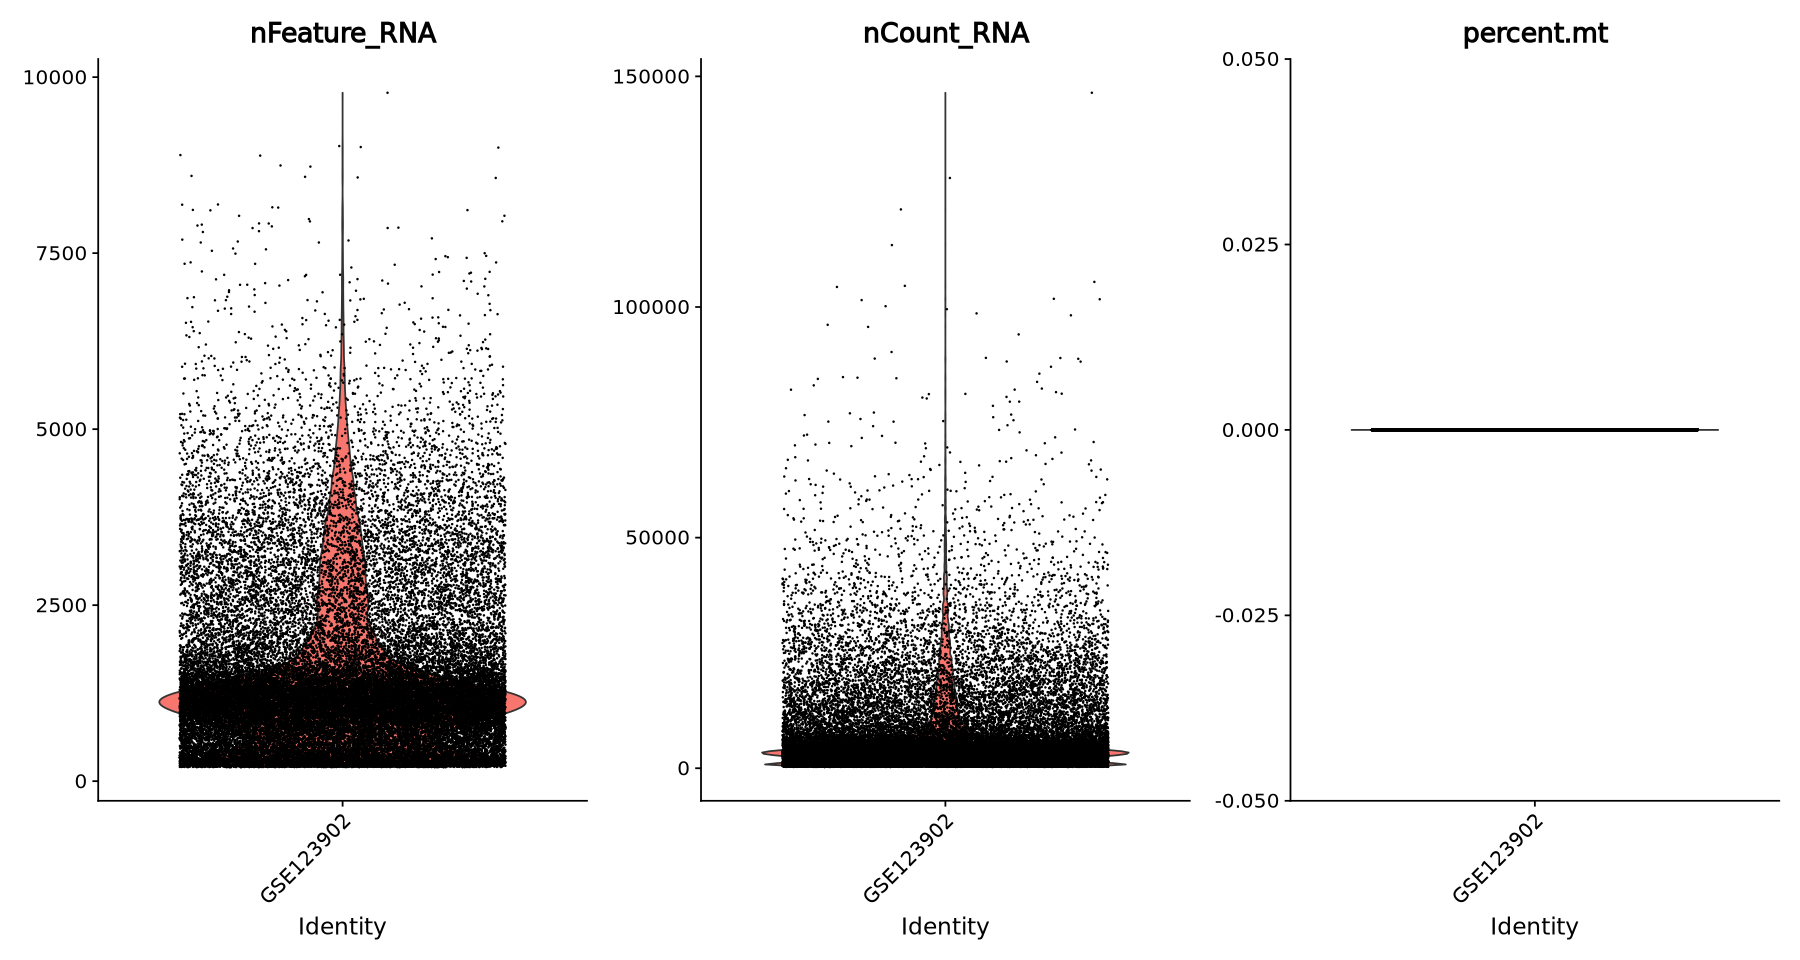

In [30]:
#QC Steps 
LUNG[["percent.mt"]] <- PercentageFeatureSet(LUNG, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(LUNG, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

** percent mt 0 for all samples

In [31]:
#Normalise the data
LUNG <- NormalizeData(LUNG)
#Find variable features
LUNG <- FindVariableFeatures(LUNG, selection.method = "vst", nfeatures = 2000)
#Scale the data
LUNG <- ScaleData(LUNG, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
LUNG <- RunPCA(LUNG, features = VariableFeatures(object = LUNG))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Normalizing layer: counts.13

Normalizing layer: counts.14

Normalizing layer: counts.15

Normalizing layer: counts.16

Normalizing layer: counts.17

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer co

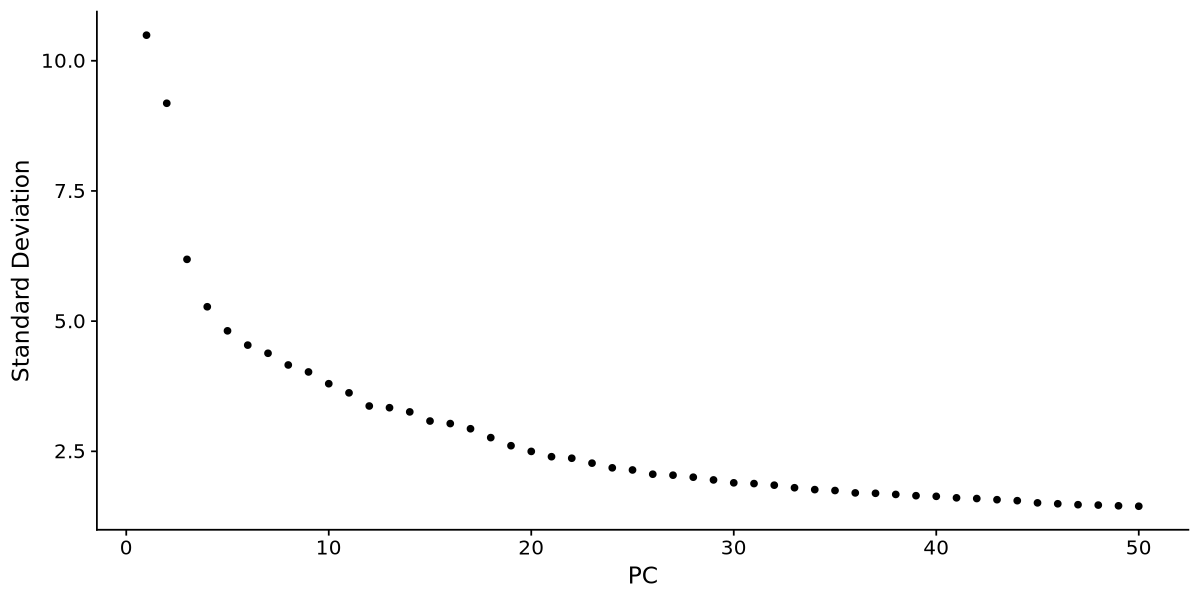

In [32]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(LUNG, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [33]:
#Find neighbours (make sure number matches no. features chosen above)
LUNG <- FindNeighbors(LUNG, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [34]:
#Run UMAP
LUNG <- RunUMAP(LUNG, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:03:49 UMAP embedding parameters a = 0.9922 b = 1.112



10:03:49 Read 39569 rows and found 40 numeric columns

10:03:49 Using Annoy for neighbor search, n_neighbors = 30

10:03:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:03:52 Writing NN index file to temp file /scratch/temp/9528992/RtmpOHorqv/file349184694acb03

10:03:52 Searching Annoy index using 1 thread, search_k = 3000

10:04:02 Annoy recall = 100%

10:04:03 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:04:04 Initializing from normalized Laplacian + noise (using RSpectra)

10:04:06 Commencing optimization for 200 epochs, with 1772728 positive edges

10:04:19 Optimization finished



In [35]:
#Cluster, resolution here set to 0.2
LUNG <- FindClusters(LUNG, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 39569
Number of edges: 1489430

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9580
Number of communities: 21
Elapsed time: 7 seconds


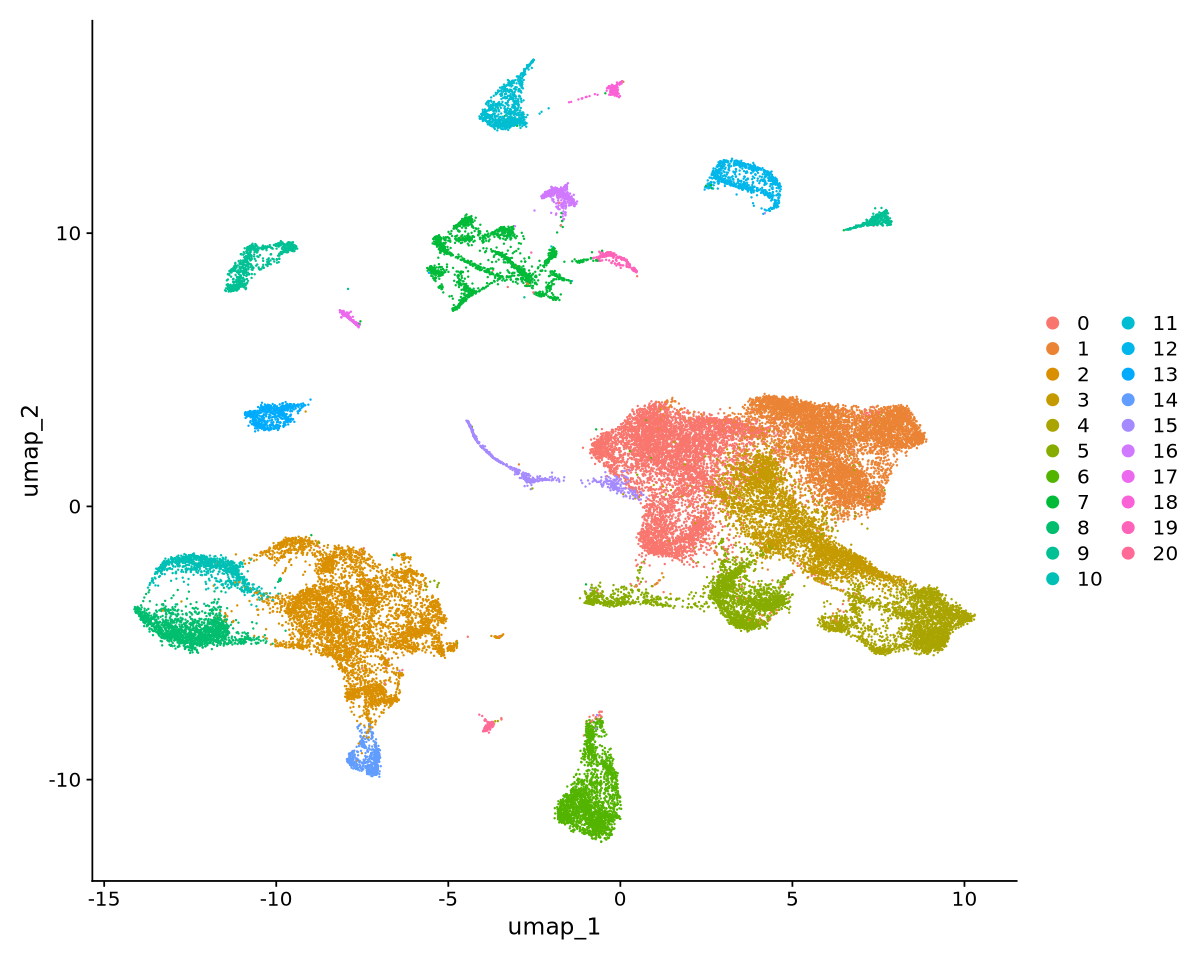

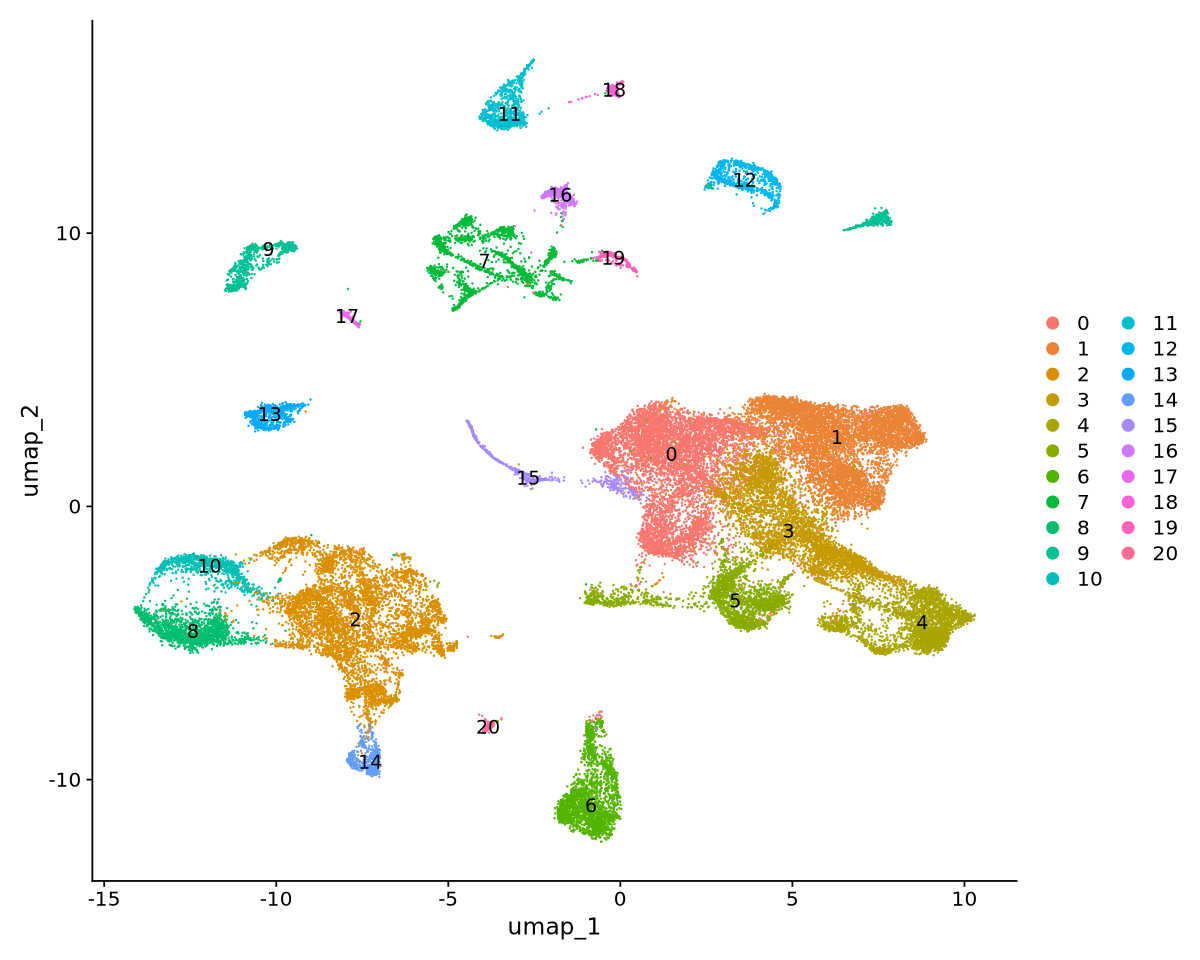

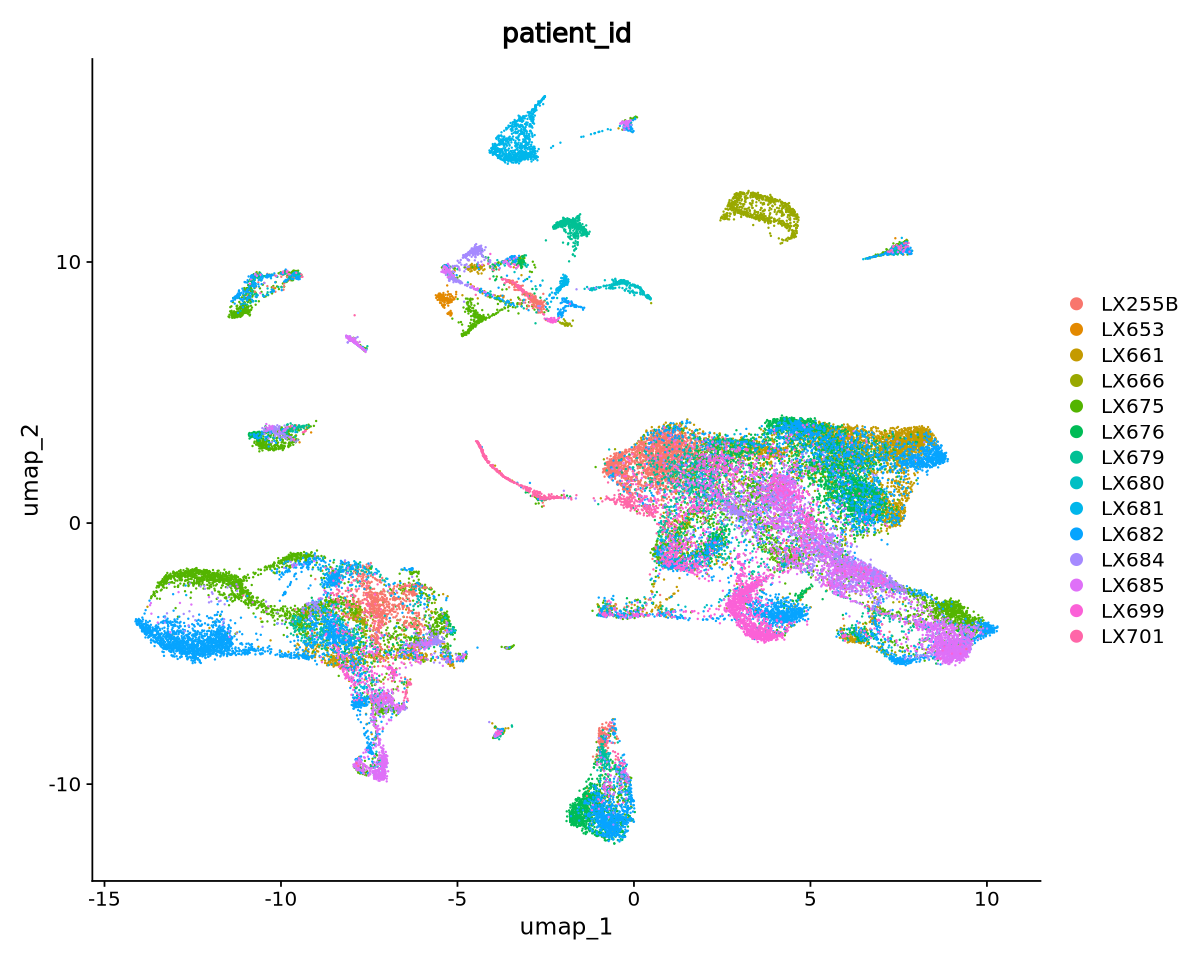

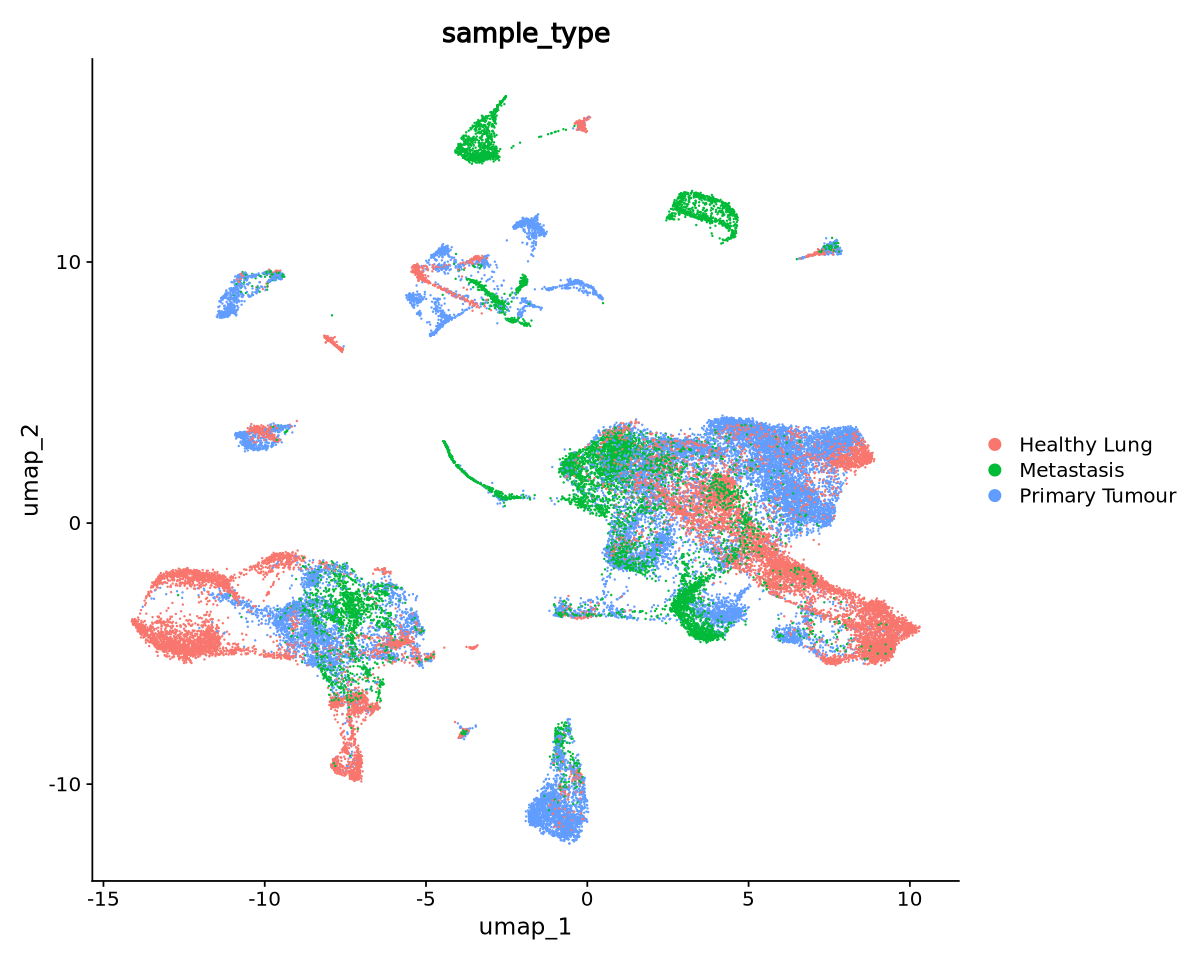

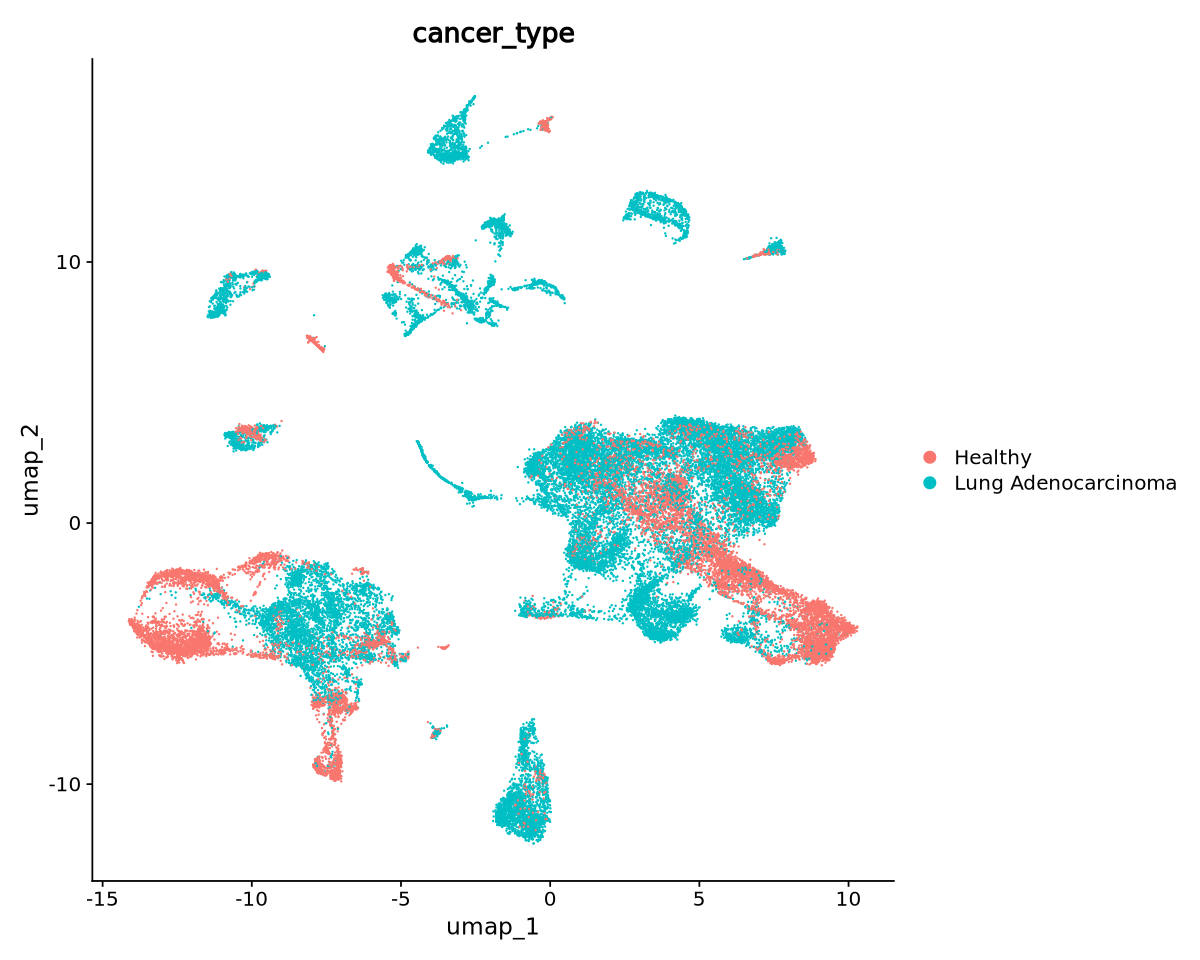

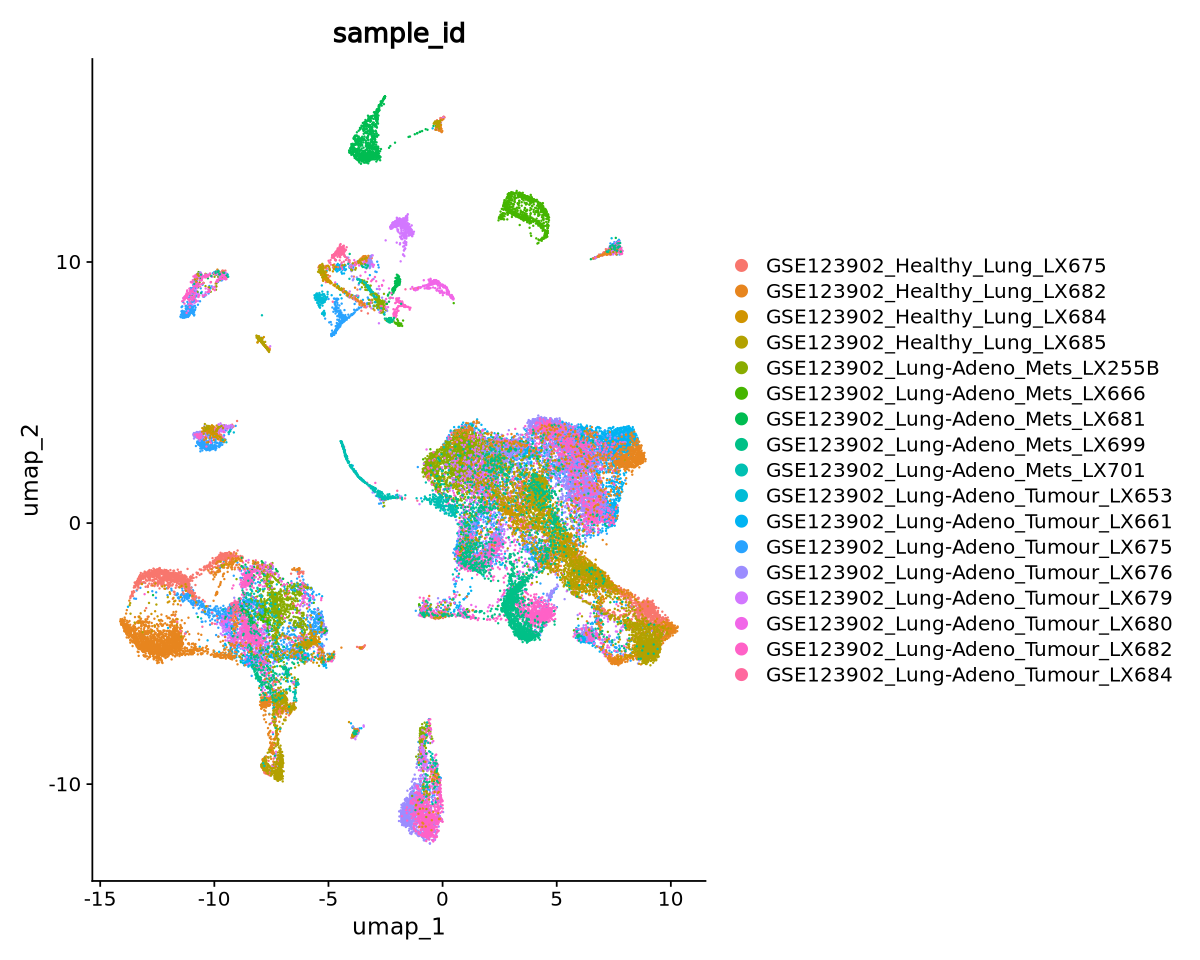

In [37]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(LUNG, reduction = "umap")
DimPlot(LUNG, reduction = "umap", label=TRUE)
DimPlot(LUNG, reduction = "umap", group = "patient_id")
DimPlot(LUNG, reduction = "umap", group = "sample_type")
DimPlot(LUNG, reduction = "umap", group = "cancer_type")
DimPlot(LUNG, reduction = "umap", group = "sample_id")

In [38]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(LUNG, file = "/scratch/user/s4436039/scdata/GSE123902/GSE123902.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

Warning message:
“The following requested variables were not found: HLA-DRA”


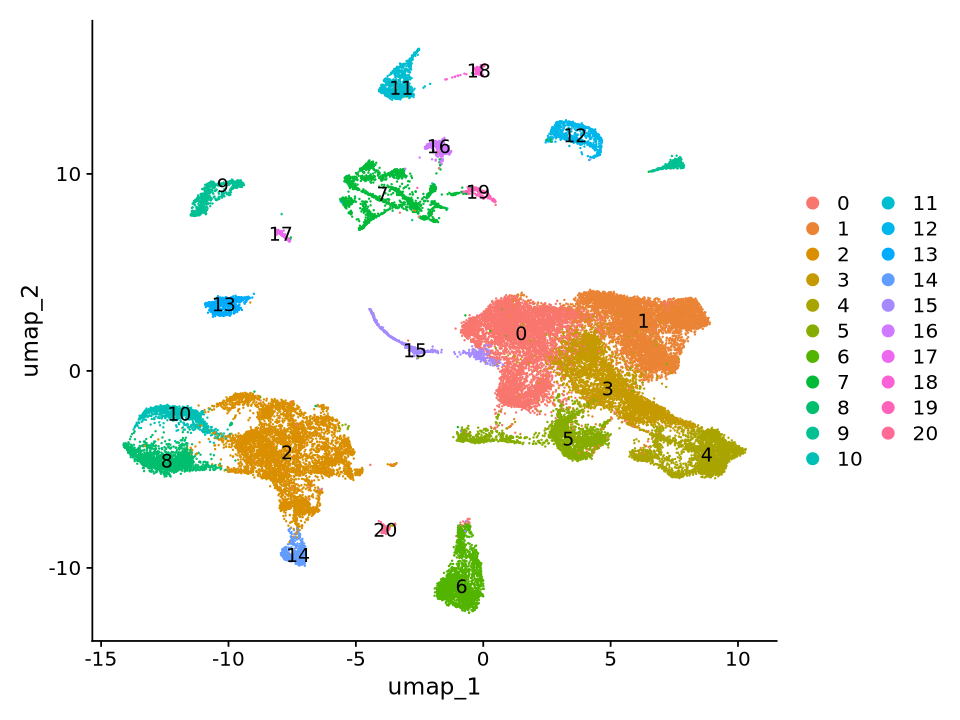

Warning message:
“The following requested variables were not found: HLA-DRA”


ERROR: Error in if (all(data[, feature] == data[, feature][1])) {: missing value where TRUE/FALSE needed


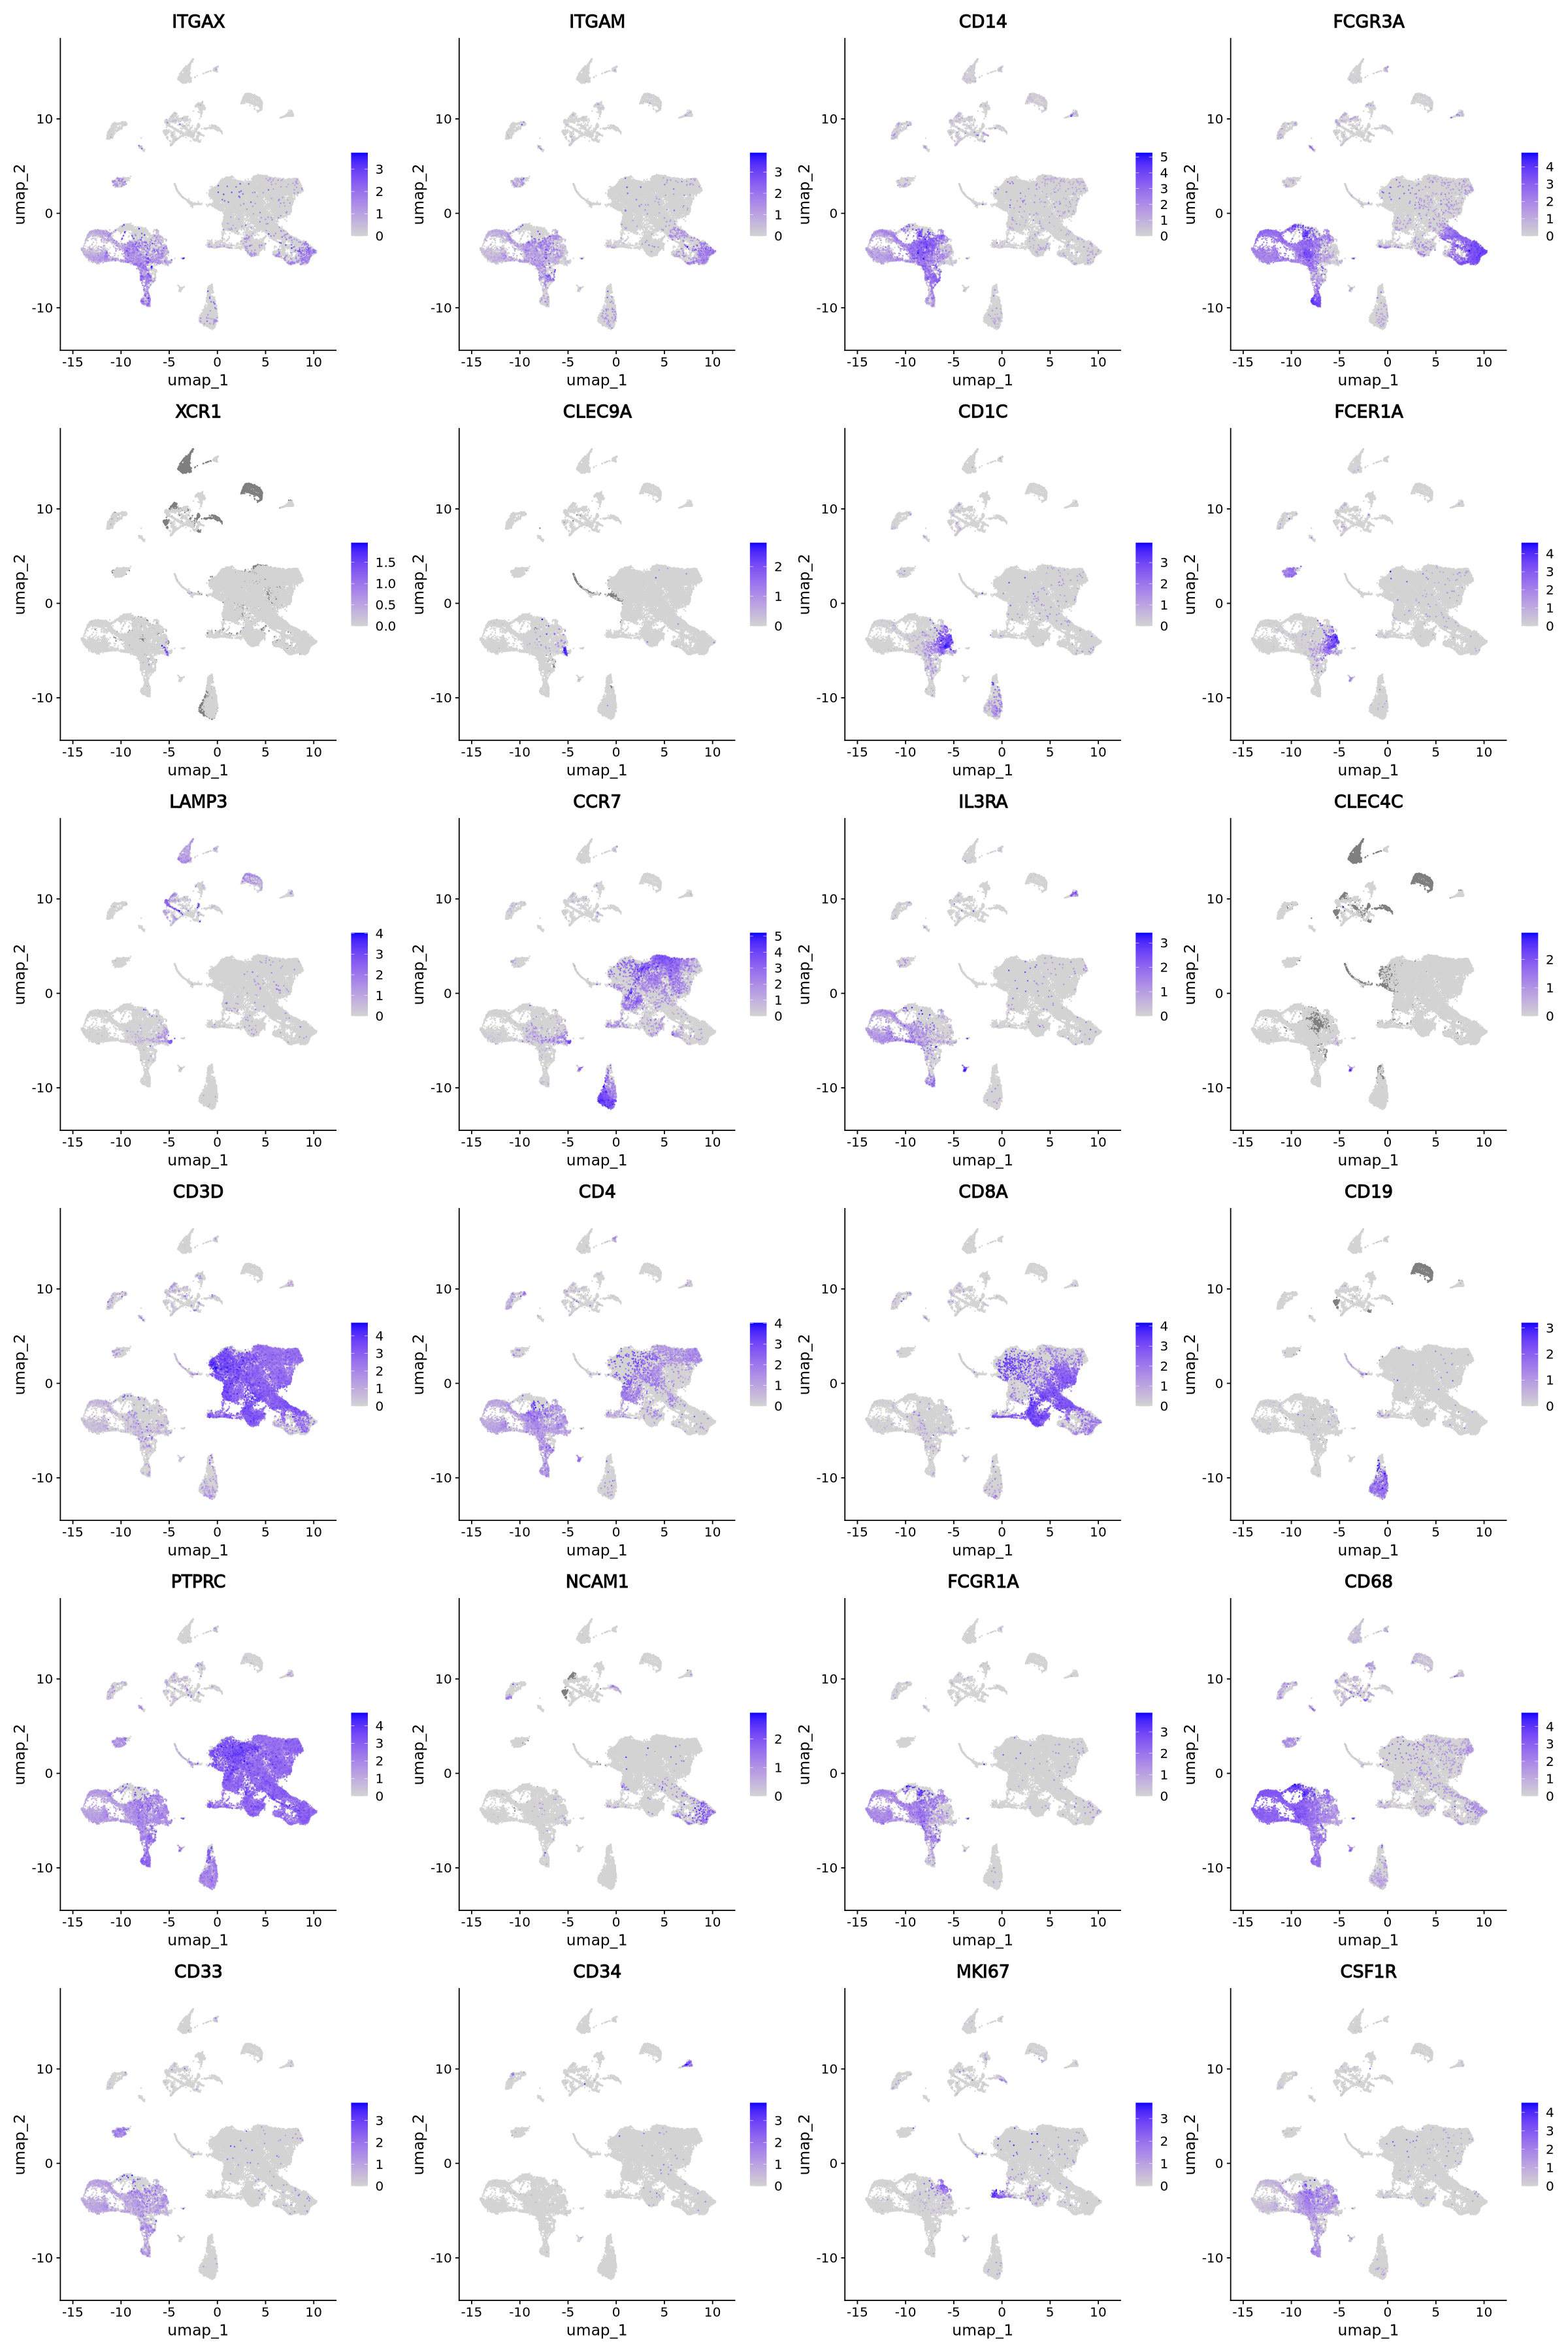

In [39]:
#Same genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(LUNG, reduction = "umap", label=TRUE)

options(repr.plot.height=30, repr.plot.width=20)
FeaturePlot(LUNG, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), order = TRUE)

#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(LUNG, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"), ncol=1)

#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(LUNG, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67", "CSF1R"))

### here down not edited

#### From above it looks like cluster 1 is the myeloid cells, now subsetting out cluster 1

In [32]:
head(OC@meta.data)

orig.ident nCount_RNA nFeature_RNA
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880   4528      1744        
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880  61565      6280        
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880  31254      6009        
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880   9374      2655        
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880   4304      1728        
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880   2659      1246        
                                     sample_type cancer_type patient_id
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAAGGTACG-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACACCATAAC-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATAACAGA-1 tumour      HGSOC       Cancer1   
GSE184880_Cancer1_AAACCCACATGACGGA-1 tumour      HGSOC       Cancer1   
                                     sample_id               percent.mt
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 GSE184880_HGSOC_Cancer1  5.477032 
GSE184880_Cancer1_AAACCCACAAGGTACG-1 GSE184880_HGSOC_Cancer1 38.377325 
GSE184880_Cancer1_AAACCCACACCATAAC-1 GSE184880_HGSOC_Cancer1 12.798362 
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 GSE184880_HGSOC_Cancer1 15.980371 
GSE184880_Cancer1_AAACCCACATAACAGA-1 GSE184880_HGSOC_Cancer1  9.223978 
GSE184880_Cancer1_AAACCCACATGACGGA-1 GSE184880_HGSOC_Cancer1  8.837909 
                                     RNA_snn_res.0.2 seurat_clusters
GSE184880_Cancer1_AAACCCAAGTATAGGT-1 0               0              
GSE184880_Cancer1_AAACCCACAAGGTACG-1 9               9              
GSE184880_Cancer1_AAACCCACACCATAAC-1 9               9              
GSE184880_Cancer1_AAACCCACAGCTGCCA-1 1               1              
GSE184880_Cancer1_AAACCCACATAACAGA-1 6               6              
GSE184880_Cancer1_AAACCCACATGACGGA-1 1               1

In [33]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.2 %in% c("1"))

In [34]:
myeloid_OC

An object of class Seurat 
27984 features across 7799 samples within 1 assay 
Active assay: RNA (27984 features, 2000 variable features)
 25 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, scale.data
 2 dimensional reductions calculated: pca, umap

In [35]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE184880/GSE184880_myeloid.RDS")

#### Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE184880/ /QRISdata/Q5935/nikita/scdata/GSE184880
```